In [1]:
from config import mypath, run_plt
import sys
sys.path.append(mypath)
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from goog_news_v2 import goog_news, wc

In [38]:
wemb = goog_news('word embedding',201909)

c:/py\goog_news_v2.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  news.gurl[0] = url


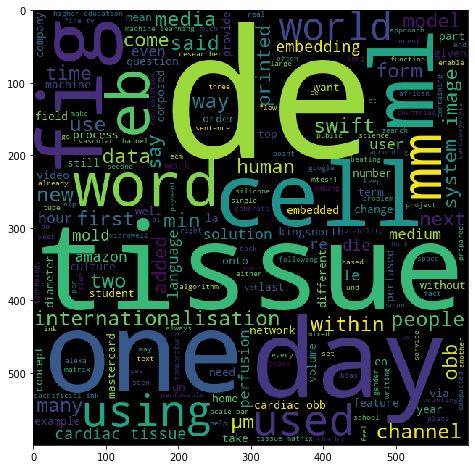

In [39]:
wc(wemb.text.sum())

In [11]:
import json

In [14]:
a = soup(requests.get(url).text,'lxml')

In [6]:
import goog_news_v2

In [ ]:
%%time
a = list(map(lambda x: goog_news('gold price',x,pages=1), [201709,201809,201909]))
a = pd.concat(a)
a.head()

In [10]:
run_plt()

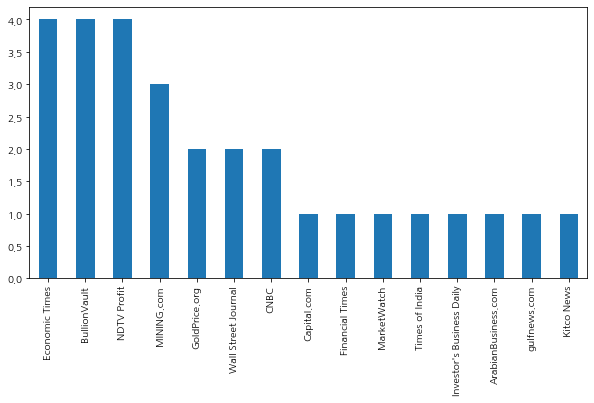

In [15]:
fig = plt.subplots(figsize=(10,5))
a.press.value_counts().plot(kind='bar')

In [16]:
a.head()

,mon,keyword,result_n,date,press,title,text,gurl
0,201709,gold price,109000.0,2017-09-05,NDTV Profit,Why Gold Prices Have Jumped To Highest Level O...,"Gold prices rose above Rs 30,500 on Monday.\n\...",https://www.google.com/search?q=gold+price&saf...
1,201709,gold price,109000.0,2017-09-25,Economic Times,Gold rate per gram: Check out current gold pri...,Never miss a great news story!\n\nGet instant ...,
2,201709,gold price,109000.0,2017-09-14,MINING.com,Gold price rebounds as ETF investors pile in,The gold price ended higher on Wednesday as sa...,
3,201709,gold price,109000.0,2017-09-19,Times of India,gold price in india: Gold price today fall by ...,NEW DELHI: Gold prices fell by another Rs 100 ...,
4,201709,gold price,109000.0,2017-09-05,MINING.com,Gold price breaks higher as hedge fund bulls o...,Image of South Korean bullfighting at Chong-do...,


In [17]:
pwd

'C:\\Users\\jeong\\proj\\nlp_paper\\py'

In [18]:
import glob

In [26]:
fn = glob.glob(r'..\data\*.csv')
pd.DataFrame(fn,columns=['fn'])

,fn
0,..\data\CBOE Volatility Index Historical Data.csv
1,..\data\fnews.csv
2,..\data\goldnws.csv
3,..\data\mod2_dv.csv
4,..\data\odf6_vec.csv
5,..\data\oilnews_200701_201909_p3.csv
6,..\data\oilnews_monthly.csv
7,..\data\oilnws_vec.csv
8,..\data\onmp.csv


In [29]:
# 일별 기사
oilnews_raw = pd.read_csv(fn[5]).drop('Unnamed: 0',axis=1)

In [30]:
oilnews_raw.head()

,mon,keyword,result_n,date,press,title,text
0,201909,oil price,5320000.0,2019-09-15,BBC News,Oil prices soar after attacks on Saudi facilities,Media playback is unsupported on your device M...
1,201909,oil price,5320000.0,2019-09-17,The New York Times,How an Oil Price Surge Could Hurt the U.S. Eco...,"For months, American consumers have kept the e..."
2,201909,oil price,5320000.0,2019-09-15,Deutsche Welle,Saudi attacks: Oil price to spike as productio...,Global oil prices are set to rise sharply afte...
3,201909,oil price,5320000.0,2019-09-17,BBC News,Oil price falls as Saudi Arabia calms supply f...,Image copyright AFP Image caption Prince Abdul...
4,201909,oil price,5320000.0,2019-09-16,The New York Times,"After Saudi Attack, Oil Market Is on Edge: ‘Wh...",HOUSTON — Fixing the damage done by the attack...


### 월별기사+doc2vec

In [32]:
oilvec = pd.read_csv(fn[7])
oilvec.head(2)

,mon,news,newslen,prng,value,v1,v2,v3,v4,v5,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100
0,200701,"ISLAMABAD, Jan 15: The government on Monday sl...",206196,50.0,54.777826,-2.709875,0.137137,0.211268,-2.77116,1.584105,...,-0.593559,0.792861,2.122578,-3.070414,0.293204,1.300541,0.42816,-0.660433,-0.269373,-3.640851
1,200702,Meters Cost Iraq Billions In Stolen Oil\n\n\n\...,201099,50.0,59.257000,-2.709875,0.137137,0.211268,-2.77116,1.584105,...,-0.593559,0.792861,2.122578,-3.070414,0.293204,1.300541,0.42816,-0.660433,-0.269373,-3.640851


In [36]:
oilvec.tail(2)

,mon,news,newslen,prng,value,v1,v2,v3,v4,v5,...,v92,v93,v94,v95,v96,v97,v98,v99,v100,date
151,201908,President Donald Trump signed an executive ord...,110119,50.0,54.839091,-2.709875,0.137137,0.211268,-2.77116,1.584105,...,0.792861,2.122578,-3.070414,0.293204,1.300541,0.42816,-0.660433,-0.269373,-3.640851,2019-08-01
152,201909,Media playback is unsupported on your device M...,97669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01


In [33]:
oilvec.shape

(153, 105)

In [34]:
oilvec['date'] = pd.to_datetime(oilvec.mon,format='%Y%m')

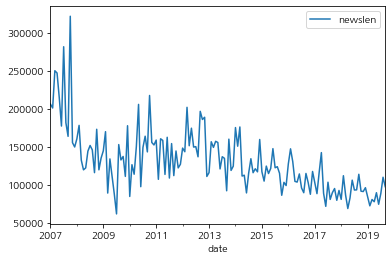

In [35]:
oilvec.plot('date','newslen')

In [40]:
pwd

'C:\\Users\\jeong\\proj\\nlp_paper\\py'

In [72]:
!pip install gensim

In [4]:
from gensim.models.doc2vec import Doc2Vec
import pandas as pd

In [5]:
from config import mypath, run_plt
import sys
sys.path.append(mypath)
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from goog_news_v2 import goog_news, wc

In [2]:
model = Doc2Vec.load('../data/oilnws_model_m.model')

In [7]:
oilv = pd.DataFrame(model.wv.get_vector('oil')).T
oilv = pd.concat([pd.DataFrame({'word':['oil']}),oilv],axis=1)

In [8]:
oilv.iloc[:,:10]

,word,0,1,2,3,4,5,6,7,8
0,oil,-0.65319,0.502434,-0.607915,-1.033846,-0.031669,-0.321593,-1.373416,1.473508,-0.477794


In [26]:
model.wv.most_similar('oil')

[('petroleum', 0.4688454270362854),
 ('oil—the', 0.4516076147556305),
 ('shale-oil', 0.438867449760437),
 ('natural-gas', 0.43462032079696655),
 ('softened', 0.4158271551132202),
 ('crude-oil', 0.40081965923309326),
 ('tar', 0.397739976644516),
 ('hydrocarbon', 0.3920101821422577),
 ('textile', 0.3888928294181824),
 ('oils', 0.3796875774860382)]

In [33]:
model.docvecs.most_similar('200806')

[('200805', 0.6887114644050598),
 ('200807', 0.5765571594238281),
 ('200810', 0.5566610097885132),
 ('200804', 0.5358145236968994),
 ('201105', 0.5285529494285583),
 ('200802', 0.5136212706565857),
 ('201103', 0.51063472032547),
 ('200803', 0.5048123598098755),
 ('200705', 0.4736809730529785),
 ('200801', 0.45889121294021606)]

In [57]:
model.wv.most_similar('shale')

[('unconventional', 0.6681588292121887),
 ('lto', 0.6207041144371033),
 ('tight', 0.612199604511261),
 ('shale-oil', 0.535236656665802),
 ('fracking', 0.5251618027687073),
 ('drillers', 0.4884931743144989),
 ('muerta', 0.48636114597320557),
 ('shales', 0.4851958751678467),
 ('vaca', 0.465049147605896),
 ('plays', 0.4584963917732239)]

In [43]:
model.wv.most_similar(positive='petroleum',negative='textile')

[('touche', 0.7156115770339966),
 ('larsen', 0.6721341609954834),
 ('h', 0.6614885330200195),
 ('ps', 0.6601621508598328),
 ('procter', 0.6523298025131226),
 ('brandt', 0.6324315071105957),
 ('p500', 0.6278417110443115),
 ('pg', 0.6093841195106506),
 ('sg', 0.6038750410079956),
 ('g', 0.6036829948425293)]

In [14]:
pwd

'C:\\Users\\jeong\\proj\\nlp_paper\\py'

In [17]:
oil_news_o = pd.read_csv('../data/oilnews_200701_201909_p3.csv').drop('Unnamed: 0',axis=1)

In [18]:
oil_news_o.head(5)

,mon,keyword,result_n,date,press,title,text
0,201909,oil price,5320000.0,2019-09-15,BBC News,Oil prices soar after attacks on Saudi facilities,Media playback is unsupported on your device M...
1,201909,oil price,5320000.0,2019-09-17,The New York Times,How an Oil Price Surge Could Hurt the U.S. Eco...,"For months, American consumers have kept the e..."
2,201909,oil price,5320000.0,2019-09-15,Deutsche Welle,Saudi attacks: Oil price to spike as productio...,Global oil prices are set to rise sharply afte...
3,201909,oil price,5320000.0,2019-09-17,BBC News,Oil price falls as Saudi Arabia calms supply f...,Image copyright AFP Image caption Prince Abdul...
4,201909,oil price,5320000.0,2019-09-16,The New York Times,"After Saudi Attack, Oil Market Is on Edge: ‘Wh...",HOUSTON — Fixing the damage done by the attack...


In [20]:
oil_news_o.text[0]

'Media playback is unsupported on your device Media caption Abqaiq is the site of Aramco\'s largest oil processing plant\n\nOil prices ended nearly 15% higher on Monday, with the Brent benchmark seeing its biggest jump in about 30 years.\n\nThe rise came after two attacks on Saudi Arabian facilities on Saturday knocked out about 5% of global supply.\n\nBrent crude initially surged 20% at the start of trading, but eased back to end at $69 a barrel, up 14.6%. US oil prices finished up 14.7%, the biggest jump since 2008.\n\nPrices fell back after President Donald Trump vowed to release US reserves.\n\nThe strike, which the US blames on Iran, has sparked fears of increased risk to energy supplies in the region.\n\nHowever, prices remain below Brent\'s 12-month high of $86.29 a barrel seen last October, when West Texas Intermediate also climbed to more than $76 a barrel.\n\nThe drone attacks on plants in the heartland of Saudi Arabia\'s oil industry hit the world\'s biggest petroleum-proces

In [22]:
oil_news = pd.read_csv('../data/oilnews_monthly.csv')

In [49]:
oil_news.head(5)

,mon,news,newslen,prng,value,date,year
0,200701,"ISLAMABAD, Jan 15: The government on Monday sl...",206196,50.0,54.777826,2007-01-01,2007
1,200702,Meters Cost Iraq Billions In Stolen Oil\n\n\n\...,201099,50.0,59.257000,2007-02-01,2007
2,200703,When an angry Enrico Mattei coined the phrase ...,250112,70.0,60.601818,2007-03-01,2007
3,200704,By Randy Fabi - Analysis\n\nA man walks past a...,247080,70.0,63.952857,2007-04-01,2007
4,200705,NEW YORK (CNNMoney.com) -- It's easy to hate B...,214732,70.0,63.507391,2007-05-01,2007


In [45]:
oil_news['date'] = pd.to_datetime(oil_news.mon, format='%Y%m')

In [48]:
oil_news['year'] = oil_news.date.dt.year

In [50]:
yroil = oil_news.groupby('year').news.sum().to_frame('news').reset_index()

In [51]:
yroil.head()

,year,news
0,2007,"ISLAMABAD, Jan 15: The government on Monday sl..."
1,2008,"Saudi Arabia, he said, shared the president’s ..."
2,2009,NEW YORK (CNNMoney.com) -- Exxon Mobil reporte...
3,2010,A dispute between Russia and Belarus over the ...
4,2011,Egypt oil threat may be overblown\n\nTraders w...


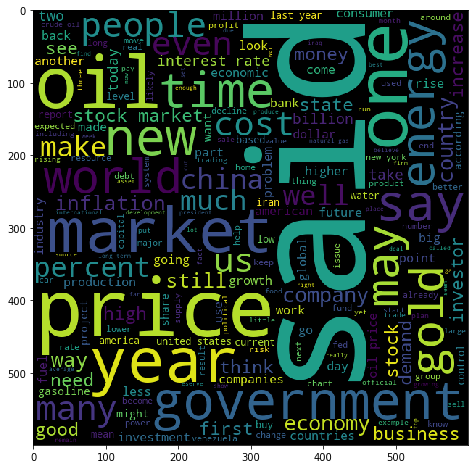

In [56]:
wc(yroil.news[0].replace('[oil,price,said]',''))

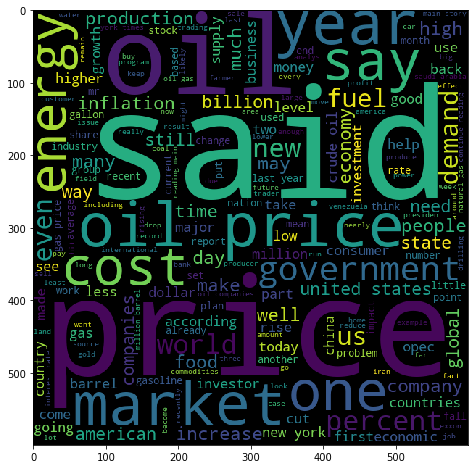

In [54]:
wc(yroil.news[1])

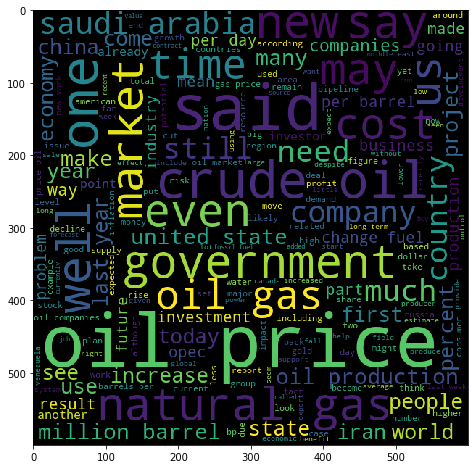

In [44]:
wc(oil_news.news.sum())

In [24]:
onv = pd.read_csv('../data/oilnws_vec.csv')

In [25]:
onv.head()

,mon,news,newslen,prng,value,v1,v2,v3,v4,v5,...,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100
0,200701,"ISLAMABAD, Jan 15: The government on Monday sl...",206196,50.0,54.777826,-2.709875,0.137137,0.211268,-2.771160,1.584105,...,-0.593559,0.792861,2.122578,-3.070414,0.293204,1.300541,0.428160,-0.660433,-0.269373,-3.640851
1,200702,Meters Cost Iraq Billions In Stolen Oil\n\n\n\...,201099,50.0,59.257000,-2.709875,0.137137,0.211268,-2.771160,1.584105,...,-0.593559,0.792861,2.122578,-3.070414,0.293204,1.300541,0.428160,-0.660433,-0.269373,-3.640851
2,200703,When an angry Enrico Mattei coined the phrase ...,250112,70.0,60.601818,-3.540743,5.519597,1.135055,-2.868148,1.124877,...,-0.894414,-1.093800,-3.131987,2.627597,1.155030,0.289684,-0.914648,1.563743,-0.937724,-0.314720
3,200704,By Randy Fabi - Analysis\n\nA man walks past a...,247080,70.0,63.952857,-3.540743,5.519597,1.135055,-2.868148,1.124877,...,-0.894414,-1.093800,-3.131987,2.627597,1.155030,0.289684,-0.914648,1.563743,-0.937724,-0.314720
4,200705,NEW YORK (CNNMoney.com) -- It's easy to hate B...,214732,70.0,63.507391,-3.540743,5.519597,1.135055,-2.868148,1.124877,...,-0.894414,-1.093800,-3.131987,2.627597,1.155030,0.289684,-0.914648,1.563743,-0.937724,-0.314720


In [59]:
gold_news = pd.read_csv('../data/goldnws.csv')

In [60]:
gold_news.head(10)

,mon,keyword,result_n,date,press,title,text,gurl
0,201909,gold price,1710000,2019-09-10T00:00:00Z,Financial Times,Subscribe to read,Become an FT subscriber to read:\n\nLeverage o...,https://www.google.com/search?q=gold+price&saf...
1,201909,gold price,1710000,2019-09-18T00:00:00Z,Wall Street Journal,Gold Price Reverses Gains As Rate Outlook Gets...,Gold prices reversed gains in aftermarket trad...,NaN
2,201909,gold price,1710000,2019-09-19T00:00:00Z,GoldPrice.org,Gold Prices Give Up Most of the Week’s Gains a...,Gold prices are lower this afternoon but are r...,NaN
3,201909,gold price,1710000,2019-09-24T00:00:00Z,GoldPrice.org,"Home Price Gains See Renewed Growth, Gold Pric...",The Holdings Calculator permits you to calcula...,NaN
4,201909,gold price,1710000,2019-09-05T00:00:00Z,MINING.com,CHART: Gold price suffers biggest fall in six ...,Bloodied but unbowed. Image by Javier Cabrio.\...,NaN
5,201909,gold price,1710000,2019-09-05T00:00:00Z,Capital.com,"Gold price forecast 2020 and beyond: to buy, o...",Precious metals have been serving mankind in v...,NaN
6,201909,gold price,1710000,2019-09-04T00:00:00Z,Economic Times,"How gold, silver, crude oil, copper may trade ...",Never miss a great news story!\n\nGet instant ...,NaN
7,201909,gold price,1710000,2019-09-02T00:00:00Z,BullionVault,Gold Prices Rise on Labor Day as Bullish Bets ...,GOLD PRICES rose Monday morning as Washington ...,NaN
8,201909,gold price,1710000,2019-09-13T00:00:00Z,Market Realist,Gold Prices: Cramer and Citigroup at Odds abou...,Gold has been one asset benefiting from the on...,NaN
9,201909,gold price,1710000,2019-09-22T00:00:00Z,Livemint,Gold prices today up ₹ 500 from one-month lows...,Gold prices in India today extended gains afte...,NaN


In [58]:
import numpy as np

In [61]:
fnews = pd.read_csv('../data/fnews.csv')

In [63]:
fnews.head(10)

,mon,keyword,result_n,date,press,title,text,gurl
0,201909,financial market,22100000.0,2019-09-08,CNBC,JP Morgan has created an index to track the ef...,President Donald Trump speaks as he receives a...,https://www.google.com/search?q=financial+mark...
1,201909,financial market,22100000.0,2019-09-25,Business Insider,The Fed pumps another $75 billion into financi...,Reuters / Chris Wattie\n\nThe Federal Reserve ...,NaN
2,201909,financial market,22100000.0,2019-09-17,CNN,A crack just emerged in the financial markets:...,New York (CNN Business) Borrowing rates skyroc...,NaN
3,201909,financial market,22100000.0,2019-09-19,Reuters,Bank of Canada taps its financial markets lead...,FILE PHOTO: A sign is pictured outside the Ban...,NaN
4,201909,financial market,22100000.0,2019-09-10,Xinhua,Economic Watch: China lifts investment quota l...,Source: Xinhua| 2019-09-11 00:45:09|Editor: Li...,NaN
5,201909,financial market,22100000.0,2019-09-11,Crowdfund Insider,Swiss Financial Market Supervisory Authority I...,The planned international scope of Libra requi...,NaN
6,201909,financial market,22100000.0,2019-09-25,Euronews,Bankers say Britain risks being shut out of EU...,By Huw Jones and Sinead Cruise\n\nLONDON (Reut...,NaN
7,201909,financial market,22100000.0,2019-09-25,The New York Times,What a Trump Impeachment Battle Means for Fina...,From the date burglars broke into the Democrat...,NaN
8,201909,financial market,22100000.0,2019-09-16,Cointelegraph,BIS Economist Proposes DLT-Based Financial Mar...,An economist of the Bank for International Set...,NaN
9,201909,financial market,22100000.0,2019-09-11,Gulf News,Dubai Financial Market launches “myAccount” el...,Dubai: The Dubai Financial Market (DFM) on Wed...,NaN


In [65]:
fnews.mon.min()

200701

In [66]:
fnews.sort_values('mon').head(10)

,mon,keyword,result_n,date,press,title,text,gurl
4269,200701,financial market,1640.0,2007-01-23,The Market Oracle,Japan forced to keep interest rates on hold as...,Japan forced to keep interest rates on hold as...,NaN
4241,200701,financial market,1640.0,2007-01-03,CNNMoney.com,"Which markets, banks open on January 2nd",NEW YORK (CNNMoney.com) -- The federal governm...,https://www.google.com/search?q=financial+mark...
4242,200701,financial market,1640.0,2007-01-13,Economist,Cultural revolution,SEPARATING truth from propaganda in China has ...,NaN
4243,200701,financial market,1640.0,2007-01-31,CNBC,"Wyeth Loses Prempro Trial, Ordered to Pay $1.5...",A state jury in Philadelphia on Monday found W...,NaN
4244,200701,financial market,1640.0,2007-01-27,New York Times,Tremors at the Door,The recent bankruptcy of Ownit Mortgage Soluti...,NaN
4245,200701,financial market,1640.0,2007-01-05,Motley Fool,Using Leveraged Funds,"Boiled down to its essential elements, success...",NaN
4246,200701,financial market,1640.0,2007-01-05,Financial Times,Subscribe to read,Explore the new agenda\n\nWe live in a time of...,NaN
4247,200701,financial market,1640.0,2007-01-26,Financial Times,Subscribe to read,Explore the new agenda\n\nWe live in a time of...,NaN
4248,200701,financial market,1640.0,2007-01-10,New York Times,Chávez Moves to Nationalize Two Industries,The announcement was the latest in a series of...,NaN
4249,200701,financial market,1640.0,2007-01-28,CNBC,West Virginia Medicaid Turns to Weight Watchers,Facing more than $100 million in annual costs ...,NaN
